<a href="https://colab.research.google.com/github/girish-kumar-l/data-analytics/blob/main/E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

pd.options.mode.chained_assignment = None

In [3]:
plt.rcParams.update(
{"font.size": 10, "figure.facecolor": "w", "axes.facecolor": "w", "axes.spines.right": False, "axes.spines.bottom": False, "xtick.top": False,
"xtick.bottom": False,
"ytick.right": False,
"ytick.left": False, }
)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

filepath = '/content/gdrive/My Drive/Colab Notebooks/ecommerce_data.csv'
data = pd.read_csv(filepath, encoding= 'unicode_escape')
data.head()

Mounted at /content/gdrive


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
  #Data Wrangling
  data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.describe() #looking at numeric info

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
#Data Cleansing

#delete duplicates
data.duplicated().sum()
data = data.drop_duplicates()

In [8]:
#missing values population
for col in data.columns:
  pct_missing = data[col].isnull().mean()
  print(f'{col} - {pct_missing :.1%}')

InvoiceNo - 0.0%
StockCode - 0.0%
Description - 0.3%
Quantity - 0.0%
InvoiceDate - 0.0%
UnitPrice - 0.0%
CustomerID - 25.2%
Country - 0.0%


In [9]:
#handling Missing Values
copy = data.copy()
data['Description'] = data['Description'].fillna("Unknown")
data['CustomerID'] = data['CustomerID'].fillna(0)

In [10]:
#Check missing vlaues
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#DataType conversion
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Quantity'] = pd.to_numeric(data['Quantity'])
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'])

In [12]:
#creating a separate column for time
data['Time'] = data['InvoiceDate'].dt.time
#creating a separate column for month
data['Month'] = data['InvoiceDate'].dt.month_name()
#creating a separate column for day name
data['Day'] = data['InvoiceDate'].dt.day_name()
#creating a column for year
data['Year']= data['InvoiceDate'].dt.year
#creating a column for total
data['Total'] = data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,December,Wednesday,2010,20.34


<Axes: ylabel='UnitPrice'>

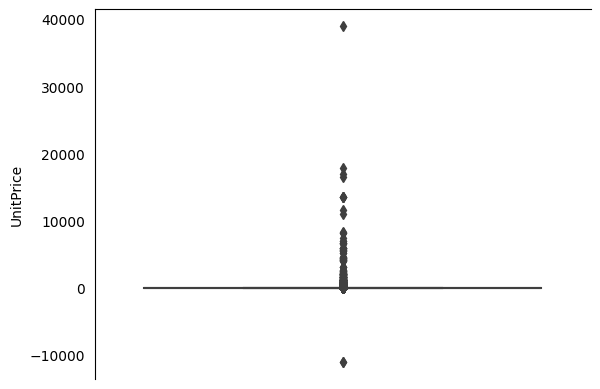

In [13]:
#Check on Unit Price Distribution
sns.boxplot( y= 'UnitPrice' ,data =data)

In [14]:
#some unit prices are less than 0, which is not correct. Let's examine what are these
data[data['UnitPrice'] < 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0.0,United Kingdom,14:51:00,August,Friday,2011,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0.0,United Kingdom,14:52:00,August,Friday,2011,-11062.06


In [15]:
#These are adjustments to bad debts. So these are not products
mask = data['Description'].str.contains('debt', case=False)
data = data[~mask] # Invert mask and use boolean indexing to filter out these bad debt adjustment rows
data = data[data['UnitPrice']>0] #filtering our data


#let's cross check once
data['UnitPrice'].min()

0.001

<Axes: ylabel='Quantity'>

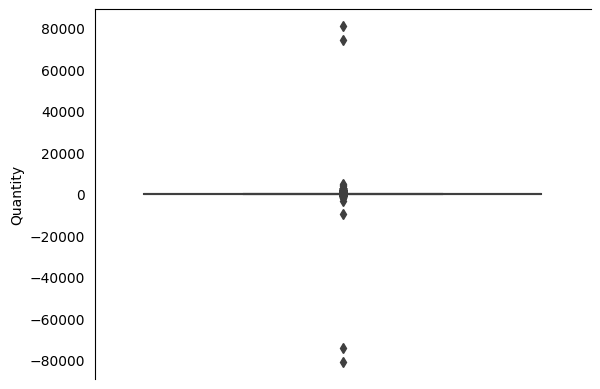

In [16]:
#check on quantity
sns.boxplot( y= 'Quantity' ,data =data)

In [17]:
#There are quantities less than 0. This may be interpreted as cancelled orders maybe. This enable business to track stocks in real time
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Time,Month,Day,Year,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,09:41:00,December,Wednesday,2010,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,09:49:00,December,Wednesday,2010,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,10:24:00,December,Wednesday,2010,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,09:57:00,December,Friday,2011,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,10:28:00,December,Friday,2011,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,11:57:00,December,Friday,2011,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,11:58:00,December,Friday,2011,-1.25


In [18]:
#for analytical needs, we can create a separate DF
cancelled_purchases = data[data['Quantity'] < 0]
data = data[data['Quantity'] > 0] #we modified our dataframe data to contain only purchased product (remove cancels)
data['Quantity'].min() # let's cross check

1

In [19]:
#how many years of data?
years = data['Year'].unique()
print(years)

[2010 2011]


<ipython-input-20-a1e368c33b55>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_2010 = data[data['Year']== 2010].groupby('Month').sum()[['Total']].reset_index()
<ipython-input-20-a1e368c33b55>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_2011 = data[data['Year']== 2011].groupby('Month').sum()[['Total']].reset_index()


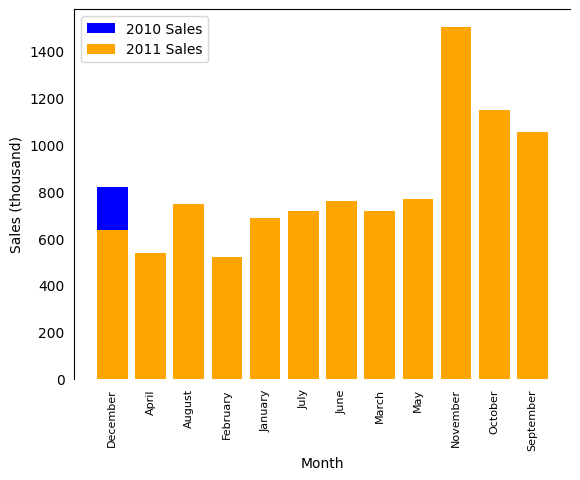

In [20]:
#Which is the best month in terms of Total Sales?
sales_2010 = data[data['Year']== 2010].groupby('Month').sum()[['Total']].reset_index()
sales_2011 = data[data['Year']== 2011].groupby('Month').sum()[['Total']].reset_index()

plt.bar(sales_2010["Month"],sales_2010['Total']/1000, label='2010 Sales', color='blue')
plt.bar(sales_2011["Month"],sales_2011['Total']/1000, label='2011 Sales', color='orange')
plt.xticks(rotation = 'vertical',size = 8)
plt.ylabel("Sales (thousand)")
plt.xlabel("Month")
plt.legend()
plt.show()


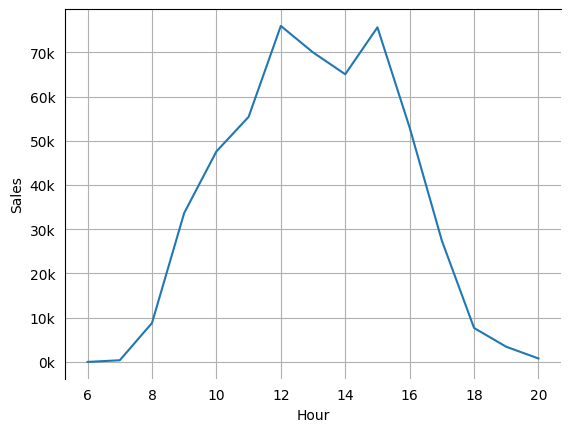

In [21]:
#2 Best time to post ads?

data['Hour']=data['InvoiceDate'].dt.hour
BestTimeAdds = data.groupby('Hour').count().reset_index()
from matplotlib.ticker import StrMethodFormatter
plt.plot(BestTimeAdds['Hour'],BestTimeAdds['InvoiceNo']/1000)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
formatter = StrMethodFormatter('{x:.0f}k')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

<ipython-input-22-fad014f9a45d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  soldMost = data.groupby('Description').sum()[['Quantity']].reset_index()


Text(0, 0.5, 'Product Description')

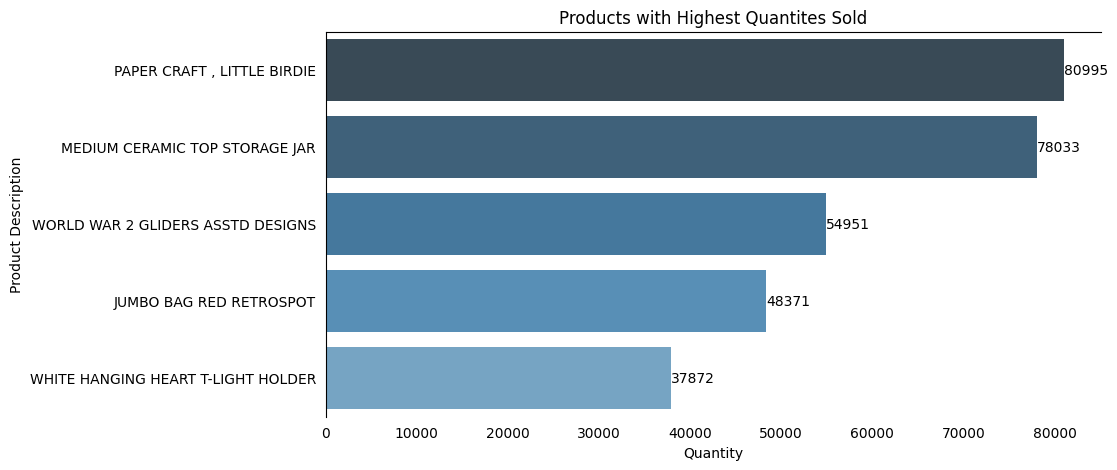

In [22]:
#3 Hero Products?
soldMost = data.groupby('Description').sum()[['Quantity']].reset_index()
soldMost = soldMost.sort_values('Quantity',ascending = False ).head(5)
soldMost

#OR

Palette = sns.color_palette('Blues_d')
Palette.reverse()
plt.figure(figsize = (10,5))
ax =sns.barplot(y = 'Description' , x= 'Quantity' , data = soldMost, palette = Palette)
ax.bar_label(ax.containers[0])
plt.title('Products with Highest Quantites Sold')
plt.ylabel('Product Description')

In [23]:
#4 what are our best product mixes?
soldTogether = data.groupby("InvoiceNo")['Description'].agg(lambda x : " , ".join(x)).reset_index()
soldTogether

,InvoiceNo,Description
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER , WHITE MET..."
1,536366,"HAND WARMER UNION JACK , HAND WARMER RED POLKA..."
2,536367,"ASSORTED COLOUR BIRD ORNAMENT , POPPY'S PLAYHO..."
3,536368,"JAM MAKING SET WITH JARS , RED COAT RACK PARIS..."
4,536369,BATH BUILDING BLOCK WORD
...,...,...
19954,581583,"LUNCH BAG RED RETROSPOT , 6 CHOCOLATE LOVE HEA..."
19955,581584,"RED FLOCK LOVE HEART PHOTO FRAME , 6 CHOCOLATE..."
19956,581585,"BLACK TEA TOWEL CLASSIC DESIGN , ASSORTED BOTT..."
19957,581586,"LARGE CAKE STAND HANGING STRAWBERY , SET OF 3..."


In [25]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in soldTogether['Description']:
  row_list = row.split(",")
  #item mostly solved together , here it shows 2 items sold together,we can change it to 3
  #to show 3 items sold together and so on ...
  count.update(Counter(combinations(row_list,2)))
#most_common is method from collections
for key,value in count.most_common(10):
  print(key,value)

(' KEY FOB ', ' KEY FOB ') 743
(' KEY FOB ', ' BACK DOOR  ') 544
(' KEY FOB ', ' SHED ') 511
(' JUMBO BAG PINK POLKADOT ', ' JUMBO BAG RED RETROSPOT ') 477
(' KEY FOB ', ' FRONT  DOOR  ') 455
(' GREEN REGENCY TEACUP AND SAUCER ', ' ROSES REGENCY TEACUP AND SAUCER  ') 443
('COFFEE', 'SUGAR ') 432
(' JUMBO SHOPPER VINTAGE RED PAISLEY ', ' JUMBO BAG RED RETROSPOT ') 427
(' SET 3 RETROSPOT TEA', 'COFFEE') 426
(' SET 3 RETROSPOT TEA', 'SUGAR ') 414


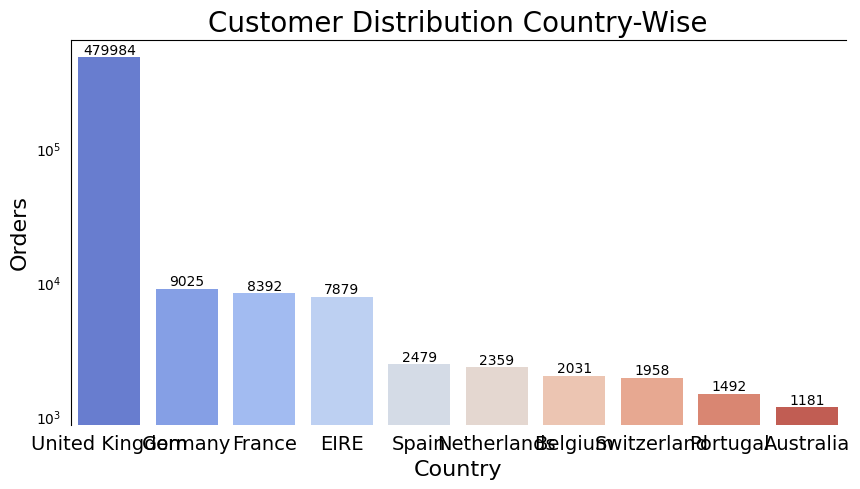

In [26]:
#Countries with biggest customer base?
custCountry = data['Country'].value_counts().reset_index(drop = False).head(10)
custCountry.columns = ['Country','Counts'] # renaming the columns

plt.figure(figsize = (10,5))
ax =sns.barplot(x= 'Country', y = 'Counts' , data = custCountry, palette = 'coolwarm')
ax.bar_label(ax.containers[0])
plt.title("Customer Distribution Country-Wise",fontsize=20)
plt.ylabel("Orders",fontsize = 16)
plt.xlabel('Country',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yscale('log')

In [27]:
#other way around to identify country wise customers
custCountry = data.groupby('Country').count()[['CustomerID']].reset_index()
custCountry = custCountry.sort_values('CustomerID',ascending = False ).head(5)
soldMost

,Description,Quantity
2386,"PAPER CRAFT , LITTLE BIRDIE",80995
2051,MEDIUM CERAMIC TOP STORAGE JAR,78033
3933,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
1815,JUMBO BAG RED RETROSPOT,48371
3843,WHITE HANGING HEART T-LIGHT HOLDER,37872


In [59]:
#Day wise total number of sales?
daySales = data.groupby('Day').count()[['InvoiceNo']].reset_index()
daySales.columns = ['Day','Sales']
daySales.sort_values(by='Day')

,Day,Sales
0,Friday,79666
1,Monday,92466
2,Sunday,62339
3,Thursday,100213
4,Tuesday,98726
5,Wednesday,91467


# **RMF Analysis**
As a algorithm the RFM was used, for being an easy-to-understand model.
The term RFM comes from the function of three acronyms:
1. Recency = Days since the customer's last purchase Frequency
2. Frequency = Number of products bought by the customer Monetarity
3. Monetary = Total spending on purchases

**Customer Score:**

The customer score ranges from 1 to 5, where the higher this number, the better. This score is assigned for each acronym independently

In [60]:
#Ignore returns/cancels
copy[~copy['InvoiceNo'].str.contains('C' ,na = False)]
#Dropping Null values in Customer ID column
copy= copy.dropna(subset= ['CustomerID'])
#Make Checkoutprice Column
copy['CheckoutPrice'] = copy['UnitPrice'] * copy['Quantity']

#Ignoring Debts
copy =copy[copy['UnitPrice']>0]

#Dealing with datatypes
copy['InvoiceDate'] = pd.to_datetime(copy['InvoiceDate'])
copy['CustomerID'] = copy['CustomerID'].astype('int64')
recent_date = copy['InvoiceDate'].max()

#Set our data to rfm Analysis
rfm = copy.groupby('CustomerID').agg({'InvoiceDate' : lambda date : (recent_date - date.max()).days ,
                                      'InvoiceNo' : lambda num :num.nunique() ,
                                      'CheckoutPrice' : lambda CheckoutPrice :CheckoutPrice.sum()} )
rfm


,InvoiceDate,InvoiceNo,CheckoutPrice
CustomerID,,,
12346,325,2,0.00
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,3,176.60


In [61]:
#rfm.columns = ['CustomerID','InvoiceDate','InvoiceNo','CheckoutPrice','Recency' ,'Frequency' , 'Monetary']
rfm.columns = ['Recency' ,'Frequency' , 'Monetary']

#Ignore 0 in Monatery so we will not need those customers in our analysis
rfm = rfm[rfm['Monetary']>0]

rfm['Recency_Score'] = pd.qcut(rfm['Recency'] ,5 , labels= [5,4,3,2,1])

rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method ='first') ,5 , labels= [1,2,3,4,5])

rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'] ,5 , labels= [1,2,3,4,5])

rfm['RFM_Score'] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) +
                    rfm['Monetary_Score'].astype(str) )



In [67]:
#Customer Segmentation
#Our Customer Segmentation
seg_map = {
    r'[1-2][1-2][1-5]': 'Hibernating',
    r'[1-2][3-4][1-5]': 'At risk',
    r'[1-2]5[1-5]' :'Cannot lose them',
    r'3[1-2][1-5]' : 'About to sleep',
    r'33[1-5]' : 'Need Attention',
    r'[3-4][4-5][1-5]' : 'Loyal Customers',
    r'[4-5][1-3][1-5]' : 'Good Potential',
    r'5[4-5][1-5]' : 'Champions',
}
rfm['Seg'] = rfm['RFM_Score'] .replace(seg_map ,regex =True)
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Seg
CustomerID,,,,,,,,
12347,1,7,4310.00,5,4,5,545,Champions
12348,74,4,1797.24,2,3,4,234,At risk
12349,18,1,1757.55,4,1,4,414,Good Potential
12350,309,1,334.40,1,1,2,112,Hibernating
12352,35,11,1545.41,3,5,4,354,Loyal Customers
...,...,...,...,...,...,...,...,...
18280,277,1,180.60,1,2,1,121,Hibernating
18281,180,1,80.82,1,2,1,121,Hibernating
18282,7,3,176.60,5,3,1,531,Good Potential


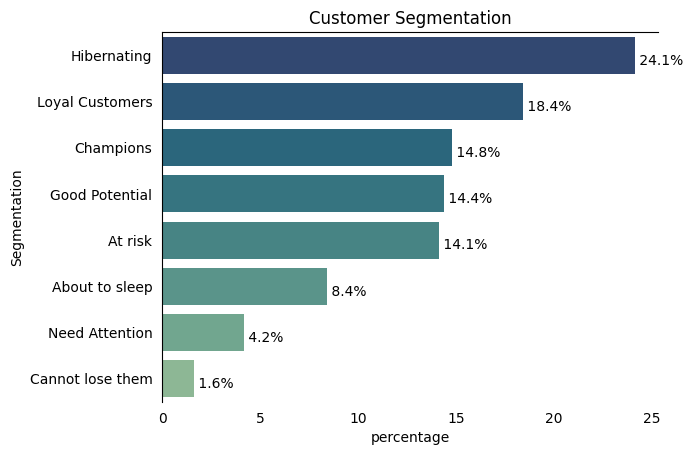

In [69]:
#Bar Plot for Our segments
Segs = (rfm['Seg'].value_counts(normalize=True)* 100).reset_index(name='percentage')
Segs = Segs.round(1)
b =sns.barplot(y='index',x='percentage', data=Segs, palette = 'crest_r')
for i, v in enumerate(Segs['percentage']):
  b.text(v,i+0.20," {:.1f}".format(v)+"%", color='black', ha="left")
  b.set_ylabel('Segmentation')
  b.set_title('Customer Segmentation')

# **Observations:**

1. 1.6% are most valuable customers - do not loose them at any cost
2. 18% of our customers are loyal
3. 14% of our cutomers are at risk segment - attract them again
4. 4% of our customers are needing more attention to make them fall under Champions segment
5. 24% of our customers are in the hibernation segment - last time was a long time back